## Day - 30 DIY

**Q1. Problem Statement:Chi-Square Test**

The “titanic.csv”dataset hasdetails of passengers on board the Titanic when it met  its  fate  in  1912. Your  job  is  tocompare  how  Passenger  class  affects  the probability of survival withthe help ofthe Chi-Square test.
Load the“titanic.csv“ data into a DataFrame and perform the following tasks:

1.Create   a   DataFrame   with   three   columns   from   the   original   dataset –"PassengerID," "PClass," "Survived or not"

2.Visualize the "PClass"and the "Survived or not"columns to get an overview of the columns

3.Plotthe correlation  between  passenger  class  and  chances  of  survival  and calculatethe survival rate for each class

4.State Null hypothesis based on the class-wise survival rate

5.Plot  the  difference  between  expected  and  observed  correlations  between passenger class and survival using heat maps to decide if there is a need for a Chi-Square Test

6.Calculate Chi-Square and P –Values for each passenger class and the entire distribution7.Accept or reject the Null hypothesis based on the results obtained

In [1]:
# importing all the neccessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [2]:
# Load the dataset
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Step 1: Create DataFrame with selected columns
selected_df = df[["PassengerId", "Survived", "Pclass"]]
print(selected_df.head())


   PassengerId  Survived  Pclass
0            1         0       3
1            2         1       1
2            3         1       3
3            4         1       1
4            5         0       3


C:\Users\sravy\AppData\Local\Temp\ipykernel_26076\1840863287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette=["skyblue","orange","green"])
C:\Users\sravy\AppData\Local\Temp\ipykernel_26076\1840863287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=["skyblue","orange"])


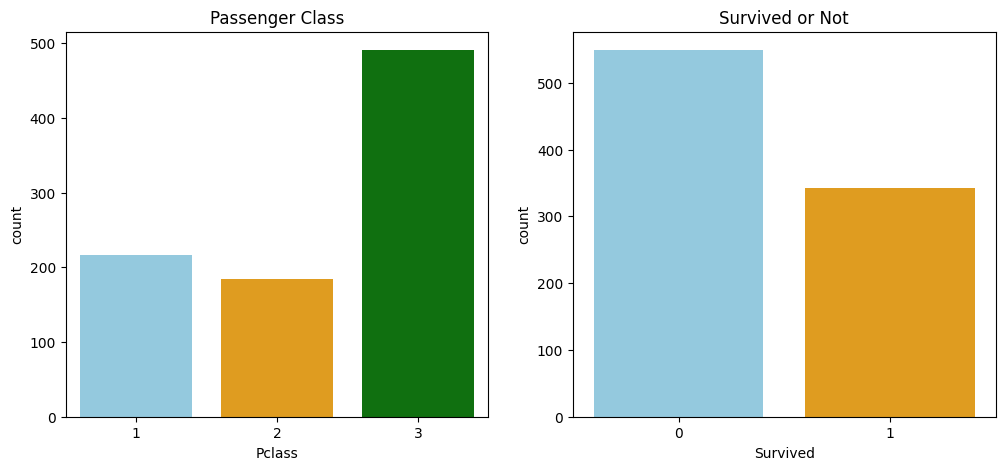

In [50]:
# Step 2: Visualize the Pclass and Survived columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', data=df, palette=["skyblue","orange","green"])
plt.title("Passenger Class")

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', data=df, palette=["skyblue","orange"])
plt.title("Survived or Not")
plt.show()

In [37]:
# Step 3: Calculate survival rate for each class
survival_rate = df.groupby('Pclass')['Survived'].mean()
print(survival_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [38]:
# Step 4: State null hypothesis
print("\nNull Hypothesis: Survival does not depend on the class passengers were traveling in.")


Null Hypothesis: Survival does not depend on the class passengers were traveling in.


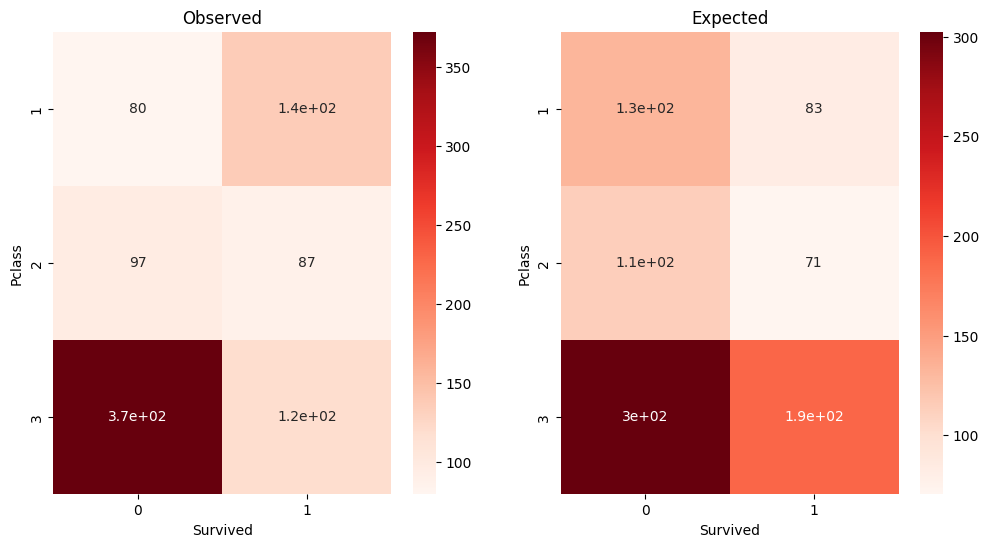

In [41]:
# Step 5: Plot expected vs observed with heatmaps
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, cmap="Reds")
plt.title("Observed")

plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), annot=True, cmap="Reds")
plt.title("Expected")
plt.show()

In [42]:
# Step 6: Calculate Chi-Square and p-value
print(f"\nChi-square value: {chi2}")
print(f"p-value: {p}")


Chi-square value: 102.88898875696056
p-value: 4.549251711298793e-23


In [43]:
# Step 7: Accept or reject the null hypothesis
if p < 0.05:
    print("\nConclusion: Reject the null hypothesis. Survival depends on passenger class.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. Survival is independent of passenger class.")


Conclusion: Reject the null hypothesis. Survival depends on passenger class.
